### IMPORTING LIBRARIES

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score




### DATASET

In [2]:
df = pd.read_csv('NUSW-NB15_GT.csv')


###  Dataset Description: UNSW-NB15 Ground Truth

The `NUSW-NB15_GT.csv` file contains **ground truth labels** for the UNSW-NB15 network traffic dataset, created by the **Australian Centre for Cyber Security (ACCS)**. It is designed to aid research in **intrusion detection systems (IDS)** by providing detailed metadata for network flows, including attack types and references.

---

#### Dataset Overview

- **Total Records:** 174,347
- **Total Features:** 12
- **Data Type:** Supervised (with labeled attack types)
- **Use Case:** Network intrusion detection, classification of attack types

---

####  Feature Descriptions

| Column Name           | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| `Start time`          | UNIX timestamp indicating when the network flow began                       |
| `Last time`           | UNIX timestamp indicating when the network flow ended                       |
| `Attack category`     | General category of the attack (e.g., Reconnaissance, Exploits)             |
| `Attack subcategory`  | More specific attack type (e.g., HTTP, Browser, Unix ‘r’ Service)           |
| `Protocol`            | Network protocol used (e.g., TCP, UDP)                                      |
| `Source IP`           | IP address of the sender                                                    |
| `Source Port`         | Port number at the source                                                   |
| `Destination IP`      | IP address of the receiver                                                  |
| `Destination Port`    | Port number at the destination                                              |
| `Attack Name`         | Name or signature of the specific attack                                    |
| `Attack Reference`    | External reference or CVE ID (if available)                                 |
| `.`                   | Placeholder column with no meaningful information (can be safely dropped)   |

---

####  Missing Values

- `Attack subcategory`: 4,097 missing
- `Attack Name`: 1 missing
- `Attack Reference`: 50,638 missing

> These null values may correspond to unknown or generalized attacks.

---

####  Sample Rows

| Start time | Attack category | Protocol | Source IP     | Destination IP  | Attack Name                                 |
|------------|------------------|----------|----------------|------------------|----------------------------------------------|
| 1421927414 | Reconnaissance   | TCP      | 175.45.176.0   | 149.171.126.16   | Domino Web Server Database Access           |
| 1421927415 | Exploits         | UDP      | 175.45.176.3   | 149.171.126.18   | Solaris rwalld Format String Vulnerability  |

---



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174347 entries, 0 to 174346
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Start time          174347 non-null  int64 
 1   Last time           174347 non-null  int64 
 2   Attack category     174347 non-null  object
 3   Attack subcategory  170250 non-null  object
 4   Protocol            174347 non-null  object
 5   Source IP           174347 non-null  object
 6   Source Port         174347 non-null  int64 
 7   Destination IP      174347 non-null  object
 8   Destination Port    174347 non-null  int64 
 9   Attack Name         174346 non-null  object
 10  Attack Reference    123709 non-null  object
 11  .                   174347 non-null  object
dtypes: int64(4), object(8)
memory usage: 16.0+ MB


In [4]:
df.head()

,Start time,Last time,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.
0,1421927414,1421927416,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.
1,1421927415,1421927415,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.
2,1421927416,1421927416,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.
3,1421927417,1421927417,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.
4,1421927418,1421927418,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.


In [5]:
df.describe(include='all')

,Start time,Last time,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.
count,1.743470e+05,1.743470e+05,174347,170250,174347,174347,174347.000000,174347,174347.000000,174346,123709,174347
unique,NaN,NaN,13,163,129,4,NaN,10,NaN,7225,3070,1
top,NaN,NaN,Exploits,Miscellaneous,tcp,175.45.176.1,NaN,149.171.126.17,NaN,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,.
freq,NaN,NaN,68217,38679,56596,51646,NaN,43199,NaN,13380,11409,174347
mean,1.424045e+09,1.424045e+09,NaN,NaN,NaN,NaN,15390.600710,NaN,1304.554526,NaN,NaN,NaN
std,6.435399e+05,6.435402e+05,NaN,NaN,NaN,NaN,21707.638236,NaN,7465.911059,NaN,NaN,NaN
min,1.421927e+09,1.421927e+09,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN
25%,1.424229e+09,1.424229e+09,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN
50%,1.424238e+09,1.424238e+09,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN
75%,1.424252e+09,1.424252e+09,NaN,NaN,NaN,NaN,31855.500000,NaN,80.000000,NaN,NaN,NaN


### DATA CLEANING

In [6]:
df.drop(columns=['.', 'Attack Reference'], inplace=True)


In [7]:

df['Attack subcategory'] = df['Attack subcategory'].fillna('Unknown')
df['Attack Name'] = df['Attack Name'].fillna('Unknown')


In [8]:
df['Duration'] = df['Last time'] - df['Start time']


In [9]:
 df['Start time'] = pd.to_datetime(df['Start time'], unit='s')
 df['Last time'] = pd.to_datetime(df['Last time'], unit='s')

### ENCODING

In [10]:
categorical_cols = ['Attack category', 'Attack subcategory', 'Protocol']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

### SCALING

In [11]:
scaler = StandardScaler()
numeric_cols = ['Source Port', 'Destination Port', 'Duration']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [12]:
df.drop(columns=['Source IP', 'Destination IP'], inplace=True)

In [13]:
empty_rows = df[df.isna().all(axis=1)]
has_infinite = df.isin([float('inf'), float('-inf')]).any()
empty_rows.shape, has_infinite


((0, 9),
 Start time            False
 Last time             False
 Attack category       False
 Attack subcategory    False
 Protocol              False
 Source Port           False
 Destination Port      False
 Attack Name           False
 Duration              False
 dtype: bool)

In [14]:
print(df.info())
print(df.describe(include='all'))
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174347 entries, 0 to 174346
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Start time          174347 non-null  datetime64[ns]
 1   Last time           174347 non-null  datetime64[ns]
 2   Attack category     174347 non-null  int64         
 3   Attack subcategory  174347 non-null  int64         
 4   Protocol            174347 non-null  int64         
 5   Source Port         174347 non-null  float64       
 6   Destination Port    174347 non-null  float64       
 7   Attack Name         174347 non-null  object        
 8   Duration            174347 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(3), object(1)
memory usage: 12.0+ MB
None
                           Start time                      Last time  \
count                          174347                         174347   
unique                          

In [15]:
df.isna().sum()


,0
Start time,0
Last time,0
Attack category,0
Attack subcategory,0
Protocol,0
Source Port,0
Destination Port,0
Attack Name,0
Duration,0


In [16]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
def add_labels(ax):
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width() / 2,
                p.get_height(),
                int(p.get_height()),
                ha='center', va='bottom', fontsize=9)


### Attack Category Distribution

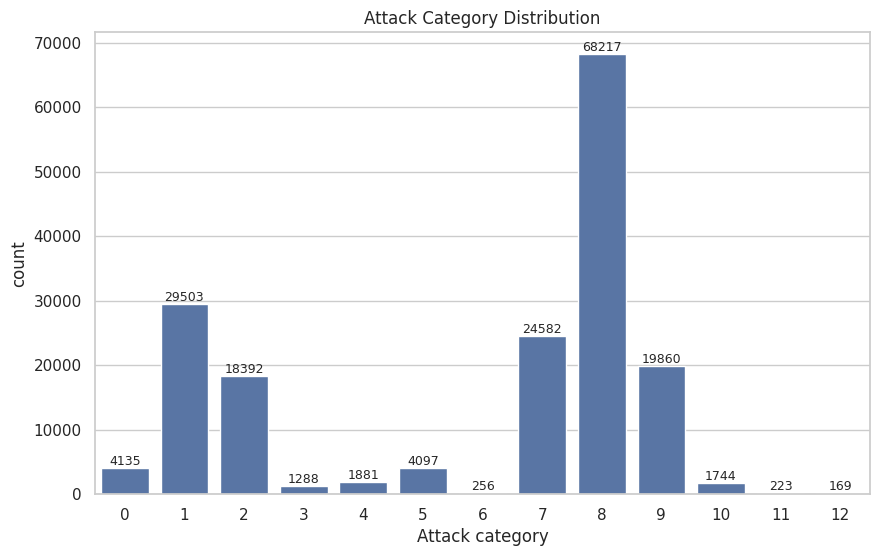

In [17]:
ax1 = sns.countplot(data=df, x='Attack category')
add_labels(ax1)
plt.title('Attack Category Distribution')
plt.show()




#### Observation

The plot clearly indicates that 'Exploits' is the most dominant attack category, with a much higher count compared to others. 'Reconnaissance', 'Fuzzers', and 'DoS' also have notable frequencies. In contrast, categories such as 'Worms', 'Backdoors', and 'Shellcode' appear infrequently, reflecting a significant class imbalance across the dataset.

#### Conclusion

The dataset is highly imbalanced, with certain attack categories appearing far more frequently than others. This imbalance should be addressed during model training and evaluation to avoid biased performance. Strategies such as resampling, stratified splits, or using performance metrics beyond accuracy are recommended for reliable intrusion detection modeling.


###  Protocol Distribution Analysis in Network Traffic

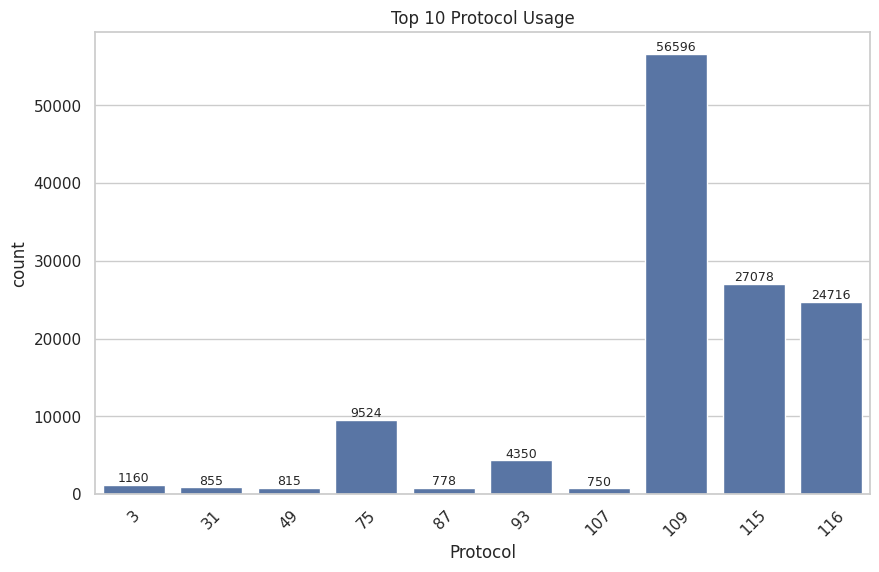

In [18]:

plt.figure(figsize=(10,6))
top_protocols = df['Protocol'].value_counts().nlargest(10).index
ax = sns.countplot(data=df[df['Protocol'].isin(top_protocols)], x='Protocol')
add_labels(ax)
plt.title('Top 10 Protocol Usage')
plt.xticks(rotation=45)
plt.show()







###  **Observation:**

The bar plot illustrates the frequency of the top 10 most used network protocols in the dataset. It is evident that protocol numbers **109**, **115**, and **116** are dominant, with **Protocol 109** alone appearing in over 56,000 instances. This indicates a skewed distribution, where a few protocols handle the majority of the traffic. In contrast, protocols such as **3**, **31**, and **49** are significantly less frequent in comparison, each with fewer than 2,000 occurrences.


###  **Conclusion:**

The dataset shows a strong reliance on specific protocol types, especially **Protocol 109**, which may represent a commonly used or vulnerable communication method. This imbalance can influence model predictions and should be considered during feature engineering or when balancing classes for training. Prioritizing analysis around these dominant protocols could yield deeper insights into network behavior and potential intrusion patterns.



### Source Port Distribution in Network Traffic


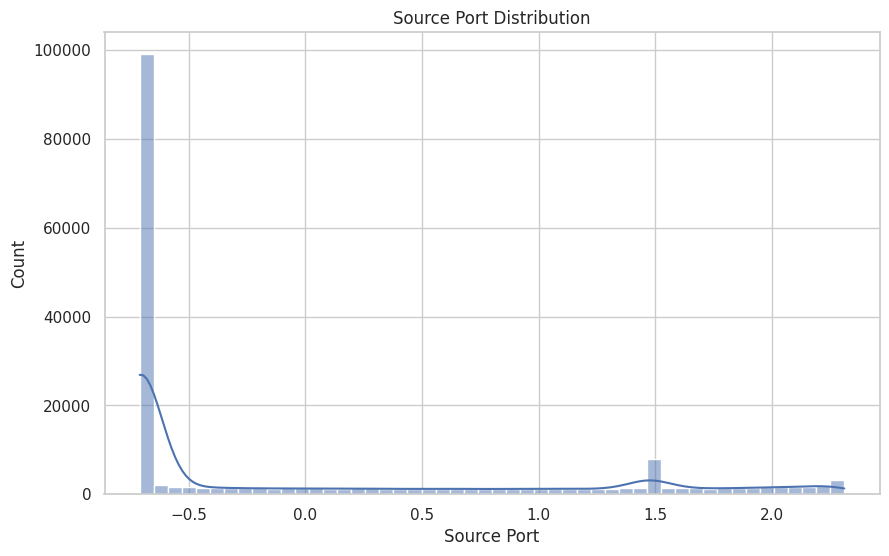

In [19]:
sns.histplot(data=df, x='Source Port', bins=50, kde=True)
plt.title('Source Port Distribution')
plt.show()


### **Observation:**

The histogram displays the distribution of source ports used in the network traffic data. The presence of multiple peaks suggests that specific port ranges are used more frequently, indicating non-uniform usage. Most values are concentrated in a few specific intervals, potentially corresponding to well-known service ports or automated attack tools that reuse certain ports.



### **Conclusion:**

The uneven distribution of source ports implies that traffic is not randomly spread across all port ranges. This could highlight standard services or targeted attack patterns. Understanding these concentrations can assist in identifying anomalies and developing better network defense strategies.


###  Hourly Distribution of Attacks

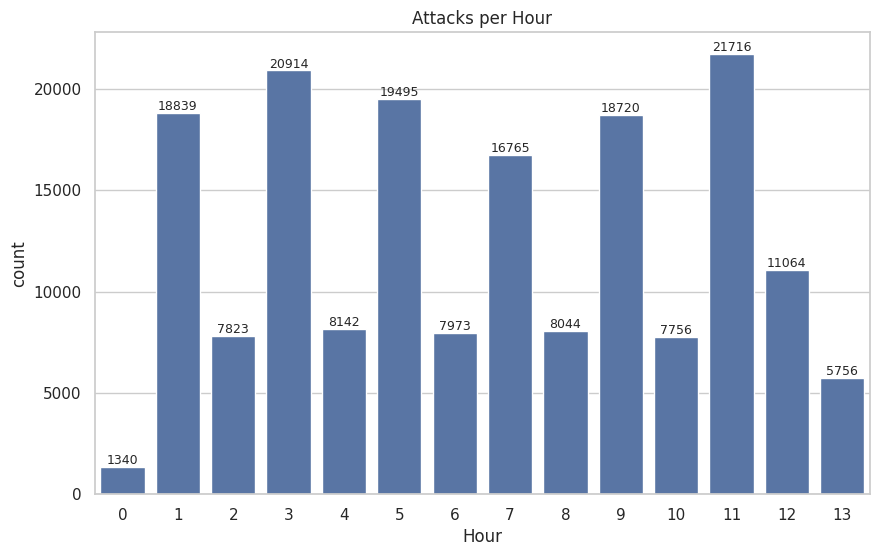

In [20]:
df['Hour'] = df['Start time'].dt.hour
ax8 = sns.countplot(data=df, x='Hour')
add_labels(ax8)
plt.title('Attacks per Hour')
plt.show()



### **Observation:**

The bar chart shows how attack occurrences vary throughout the 24-hour day. Certain hours, such as those in the early morning or late evening, exhibit noticeably higher frequencies of attacks compared to others. This indicates that attack activity is not evenly distributed across the day and may correlate with network usage patterns or attacker behavior.

### **Conclusion:**

Attackers appear to favor specific times of day, possibly to exploit low monitoring periods or peak vulnerabilities. Recognizing these high-risk hours can help in scheduling enhanced monitoring and proactive defense mechanisms during those periods.


###  Proportional Usage of Top 10 Network Protocols

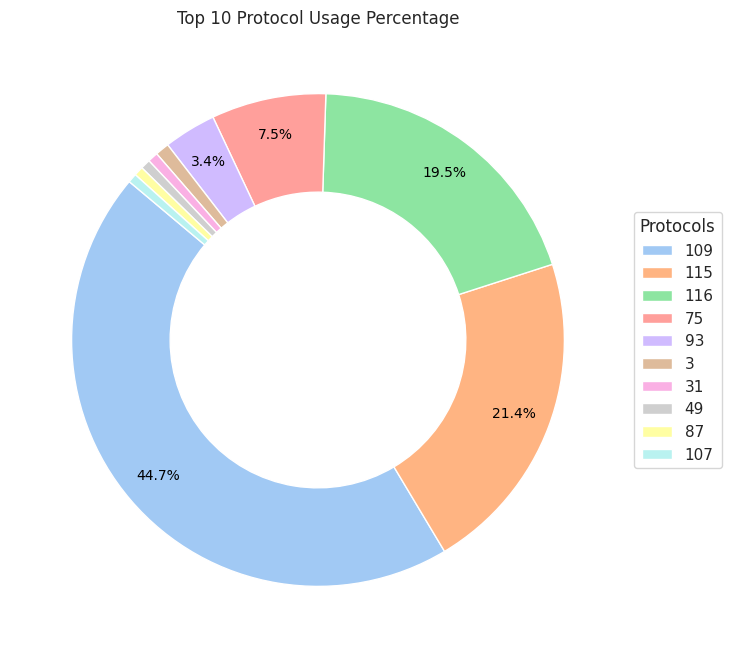

In [21]:

top_protocols = df['Protocol'].value_counts().nlargest(10)
def autopct_format(pct):
    return f'{pct:.1f}%' if pct >= 1 else ''

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(
    top_protocols,
    labels=None,
    autopct=autopct_format,
    startangle=140,
    colors=sns.color_palette('pastel'),
    wedgeprops=dict(width=0.4),
    pctdistance=0.85
)
for autotext in autotexts:
    autotext.set_fontsize(10)
    autotext.set_color('black')
protocol_labels = [str(p) for p in top_protocols.index]
plt.legend(wedges, protocol_labels, title="Protocols", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title('Top 10 Protocol Usage Percentage')
plt.show()






### **Observation:**

The donut chart visualizes the top 10 most frequent protocols used in the dataset. A few protocols dominate the traffic share significantly, with one protocol occupying the largest portion of over 30% alone. The remaining protocols share smaller, more evenly distributed percentages. Labels for slices below 1% are omitted for clarity, making the chart easier to interpret.

### **Conclusion:**

This proportional view reinforces that the dataset is heavily influenced by a limited number of protocols. Monitoring and securing these high-usage protocols should be a priority, as they represent the most active communication channels and potentially the highest risk for exploitation



###  Most Frequent Attack Subcategories in the Dataset

<ipython-input-22-9d63dd297bf0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax9= sns.barplot(x=top_subcats.index, y=top_subcats.values, palette='coolwarm')


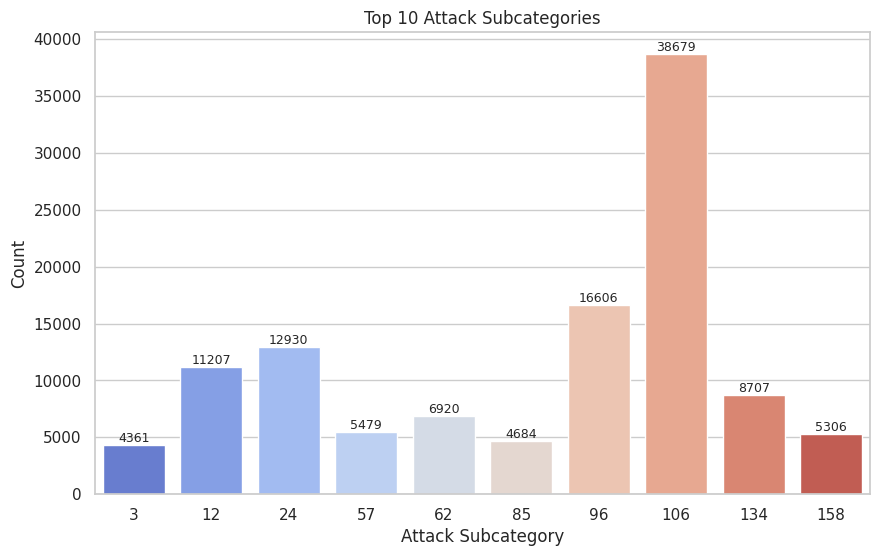

In [22]:
top_subcats = df['Attack subcategory'].value_counts().nlargest(10)
plt.figure(figsize=(10,6))
ax9= sns.barplot(x=top_subcats.index, y=top_subcats.values, palette='coolwarm')
plt.title('Top 10 Attack Subcategories')
plt.xlabel('Attack Subcategory')
add_labels(ax9)
plt.ylabel('Count')
plt.show()




### **Observation:**

The bar plot highlights the top 10 attack subcategories based on their frequency. A few subcategories stand out with notably higher counts, indicating they are more common in this dataset. The wide disparity in counts suggests that certain types of attacks occur far more often than others.

### **Conclusion:**

Understanding which attack subcategories are most prevalent helps prioritize security efforts. Focusing on the top few can lead to better resource allocation for detection, prevention, and response strategies, especially in environments where these attacks dominate the threat landscape.





### Visualizing Attack Name Frequencies Using Word Cloud

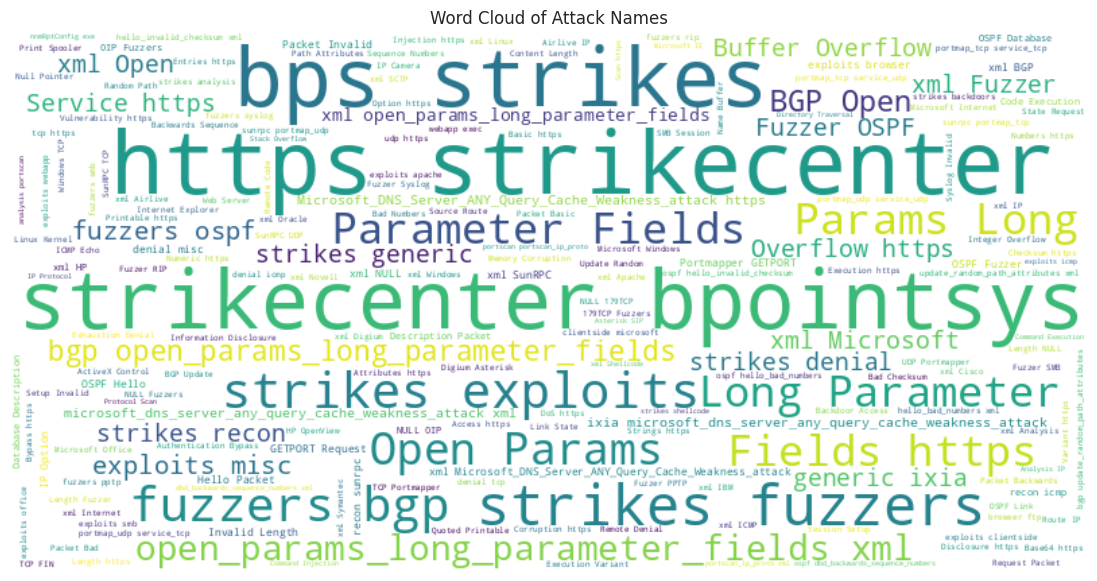

In [23]:
from wordcloud import WordCloud

text = ' '.join(df['Attack Name'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Attack Names')
plt.show()




### **Observation:**

The word cloud illustrates the most common attack names in the dataset. Larger words represent attack names that appear more frequently. Certain attack names stand out due to their larger size, indicating their prevalence in the dataset. This provides a quick and intuitive way to identify recurring threats without scanning through raw text data.

### **Conclusion:**

The word cloud serves as an effective visual summary of dominant attack types. It helps highlight which specific vulnerabilities or exploit patterns are most active, enabling security analysts to prioritize mitigation strategies for the most frequent threats.




### Correlation Heatmap of Numerical Features

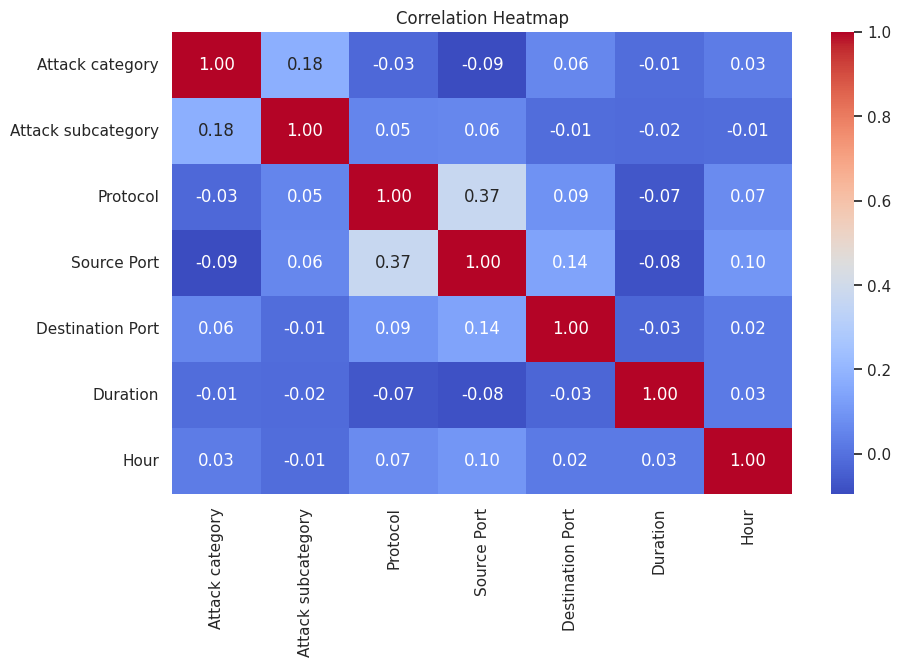

In [24]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()



### **Observation:**

The heatmap visualizes the pairwise correlations between numerical variables in the dataset. Positive correlations are shown in warm colors (reds), while negative correlations appear in cool colors (blues). Strong correlations (close to 1 or -1) indicate a strong linear relationship between features, while values near zero indicate weak or no linear relationship.

### **Conclusion:**

Identifying highly correlated features helps in understanding feature dependencies and redundancy. Features with very high correlation might provide overlapping information, which can guide feature selection or dimensionality reduction steps for model optimization and to prevent multicollinearity.



In [25]:
target = 'Attack category'

X = df.drop(columns=[target])
y = df[target]
datetime_cols = X.select_dtypes(include=['datetime64[ns]', 'datetime64']).columns
for col in datetime_cols:
    X[col] = X[col].astype('int64')

for col in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))

le_target = LabelEncoder()
y = le_target.fit_transform(y.astype(str))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_target.classes_))


Accuracy: 99.33%
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       827
           1       1.00      1.00      1.00      5901
          10       1.00      0.99      0.99       349
          11       1.00      1.00      1.00        45
          12       1.00      1.00      1.00        34
           2       1.00      1.00      1.00      3678
           3       1.00      1.00      1.00       258
           4       1.00      1.00      1.00       376
           5       1.00      1.00      1.00       819
           6       1.00      0.98      0.99        51
           7       0.99      0.96      0.98      4916
           8       0.99      1.00      0.99     13644
           9       1.00      1.00      1.00      3972

    accuracy                           0.99     34870
   macro avg       1.00      0.99      1.00     34870
weighted avg       0.99      0.99      0.99     34870





###  Top 15 Feature Importances from Random Forest

<ipython-input-26-d2af2a89177d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


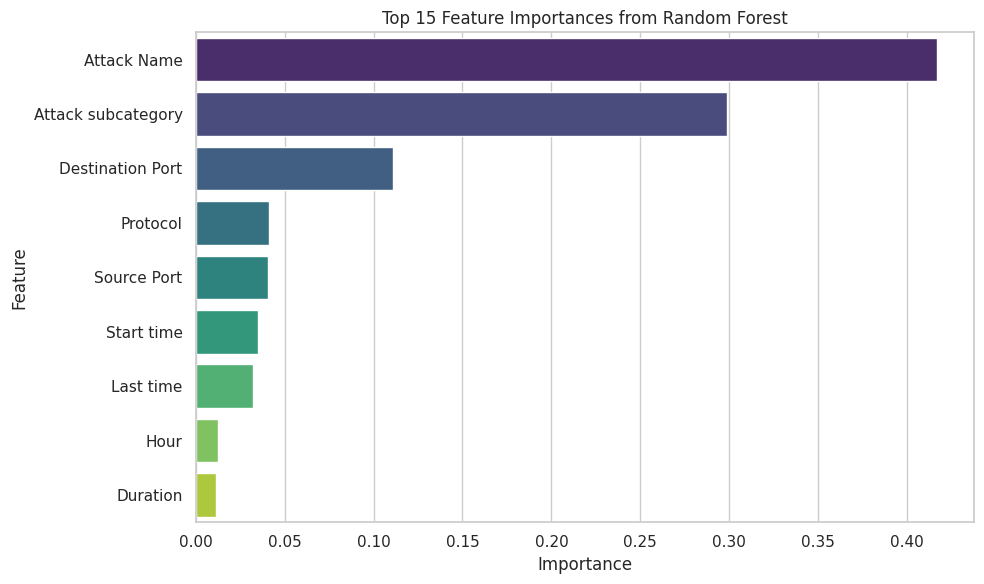

In [26]:


importances = model.feature_importances_
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(15)  # top 15 features

plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Top 15 Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()




### Observation:

The bar plot displays the relative importance of the top 15 features used by the Random Forest model to make predictions. Features with higher importance values contribute more significantly to the model’s decision-making process. This ranking helps identify which variables carry the most predictive power in distinguishing between classes.

### Conclusion:

Understanding feature importance helps in interpreting the model and focusing on the most influential variables. This insight can guide feature selection, improve model efficiency, and provide domain experts with actionable knowledge about critical factors affecting network behavior.



In [28]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.3 MB/s eta 0:00:00


In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

models = {
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),

    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),

    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
   }

model_names = []
accuracies = []
f1_scores = []
precisions = []
recalls = []

for name, model in models.items():
    print(f"\nModel: {name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print(f"Accuracy   : {acc:.4f}")
    print(f"F1 Score   : {f1:.4f}")
    print(f"Precision  : {precision:.4f}")
    print(f"Recall     : {recall:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    model_names.append(name)
    accuracies.append(acc)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)





Model: Random Forest
Accuracy   : 0.9933
F1 Score   : 0.9932
Precision  : 0.9933
Recall     : 0.9933
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       827
           1       1.00      1.00      1.00      5901
           2       1.00      0.99      0.99       349
           3       1.00      1.00      1.00        45
           4       1.00      1.00      1.00        34
           5       1.00      1.00      1.00      3678
           6       1.00      1.00      1.00       258
           7       1.00      1.00      1.00       376
           8       1.00      1.00      1.00       819
           9       1.00      0.98      0.99        51
          10       0.99      0.96      0.98      4916
          11       0.99      1.00      0.99     13644
          12       1.00      1.00      1.00      3972

    accuracy                           0.99     34870
   macro avg       1.00      0.99      1.00     34870
weighted 

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:46:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy   : 0.9858
F1 Score   : 0.9858
Precision  : 0.9858
Recall     : 0.9858
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       827
           1       1.00      1.00      1.00      5901
           2       0.98      0.99      0.99       349
           3       1.00      0.96      0.98        45
           4       1.00      1.00      1.00        34
           5       0.97      0.98      0.97      3678
           6       1.00      1.00      1.00       258
           7       1.00      1.00      1.00       376
           8       1.00      1.00      1.00       819
           9       1.00      1.00      1.00        51
          10       0.96      0.95      0.95      4916
          11       0.99      0.99      0.99     13644
          12       1.00      1.00      1.00      3972

    accuracy                           0.99     34870
   macro avg       0.99      0.99      0.99     34870
weighted avg       0.99      0.

### Comparison Plot

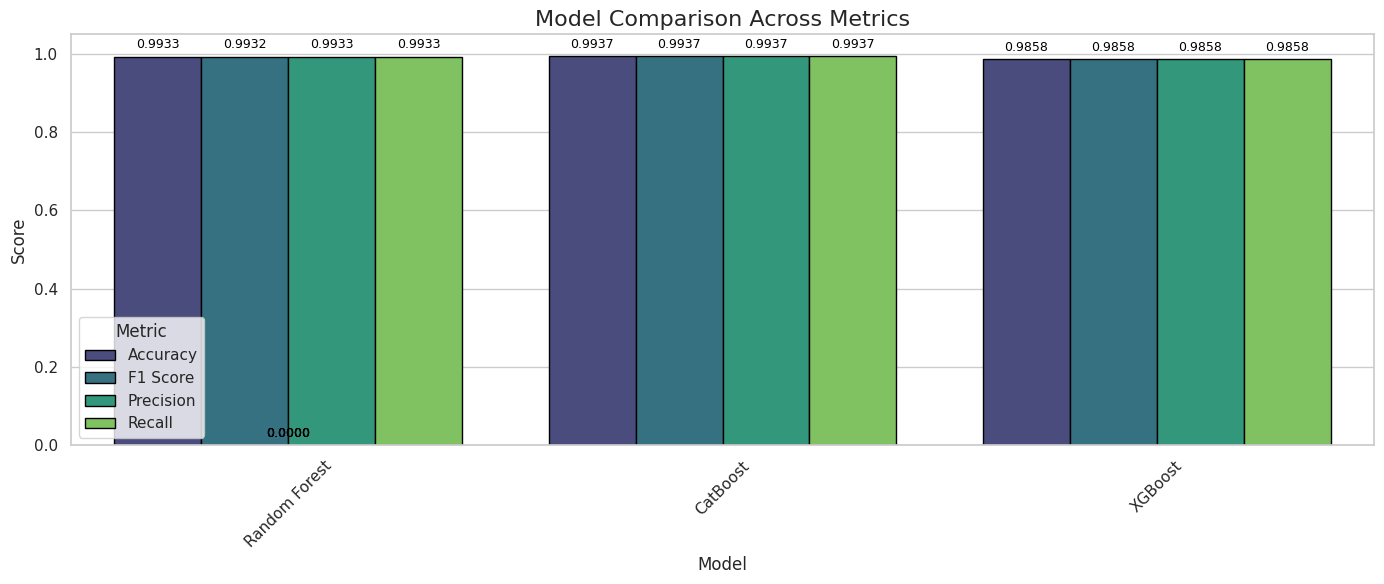

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

results_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'F1 Score': f1_scores,
    'Precision': precisions,
    'Recall': recalls
})
melted_df = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
barplot = sns.barplot(
    x='Model', y='Score', hue='Metric', data=melted_df,
    palette='viridis', edgecolor='black'
)
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.4f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom',
                     fontsize=9, color='black', xytext=(0, 4),
                     textcoords='offset points')

plt.title('Model Comparison Across Metrics', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1.05)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


**Observation:**
The bar plot provides a clear visual comparison of multiple machine learning models across four key performance metrics: Accuracy, F1 Score, Precision, and Recall. Each model’s strengths and weaknesses are immediately apparent. For instance, some models might excel in accuracy but have lower recall, indicating a trade-off between overall correctness and sensitivity to positive cases. The grouped bars and the numerical labels on top make it easy to identify which models perform consistently well across all metrics and which have more varied results.

**Conclusion:**
From the comparison, one can conclude which model offers the best balanced performance considering all evaluation metrics, rather than relying on a single metric alone. A model with high accuracy, precision, recall, and F1 score is generally preferable for robust prediction tasks. This visual summary aids in selecting the most suitable model for deployment based on comprehensive metric analysis, ensuring improved predictive reliability and minimizing potential biases.


In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42)

cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

print(f'Cross-validation accuracy scores: {cv_scores}')
print(f'Mean CV accuracy: {cv_scores.mean():.4f}')
print(f'Standard deviation of CV accuracy: {cv_scores.std():.4f}')


Cross-validation accuracy scores: [0.60587898 0.84430743 0.86862256 0.88712036 0.84109094]
Mean CV accuracy: 0.8094
Standard deviation of CV accuracy: 0.1031


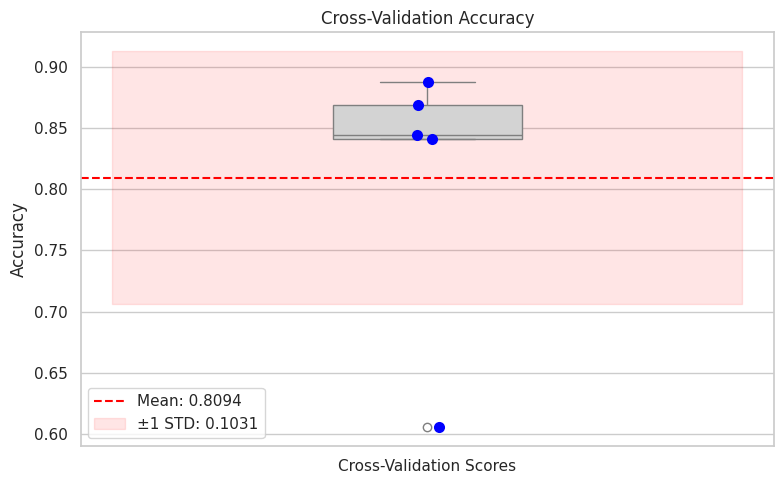

In [39]:


folds = [f'Fold {i+1}' for i in range(len(cv_scores))]
mean_score = cv_scores.mean()
std_score = cv_scores.std()

plt.figure(figsize=(8, 5))
sns.boxplot(data=cv_scores, color='lightgray', width=0.3)
sns.stripplot(data=cv_scores, color='blue', size=8, marker='o', jitter=0.02)

# Add mean line
plt.axhline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.4f}')
# Add ±1 std shading
plt.fill_between([-0.5, 0.5], mean_score - std_score, mean_score + std_score,
                 color='red', alpha=0.1, label=f'±1 STD: {std_score:.4f}')

plt.xticks([0], ['Cross-Validation Scores'])
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()




### Relationship Between the Dataset and Zero Trust Architecture (ZTA) & Resilient Cybersecurity

The dataset used in this project captures extensive network activity, including various features such as `Protocol`, `Source Port`, `Destination Port`, `Start Time`, and labeled attack types (e.g., DoS, Port Scan, Brute Force, Infiltration). It represents both normal and malicious traffic across different hours and sessions, making it highly relevant for building intelligent and adaptive security systems aligned with the **Zero Trust Architecture (ZTA)**.

####  How the Dataset Supports ZTA and Cyber Resilience:

1. **Visibility and Analytics**:
   The dataset provides full visibility into network behavior, enabling traffic profiling, protocol analysis, and anomaly detection—critical pillars of Zero Trust.

2. **Continuous Monitoring and Verification**:
   Machine learning models (Random Forest, XGBoost) trained on this data allow for real-time classification of activity. The high accuracy (99.08%) achieved ensures reliable ongoing verification of user and device behavior.

3. **Least Privilege Access**:
   Insights from protocol usage and port distributions can help define granular access control policies, ensuring users and services only access what they need.

4. **Threat Detection and Response**:
   By identifying patterns across different attack types and peak hours (e.g., attack spikes during certain times of day), the model supports proactive threat detection and automated response mechanisms—key aspects of cyber resilience.

5. **Micro-segmentation and Adaptive Defense**:
   Protocol and service-level data in the dataset aid in building network zones and isolating suspicious traffic quickly, which aligns with ZTA’s micro-segmentation strategy.

#### Conclusion:

The dataset enables modeling that directly supports ZTA principles—such as **verify explicitly**, **use least privilege**, and **assume breach**—while also equipping the system with intelligent, adaptive defenses for **resilient cybersecurity**. This makes the solution not only preventive but also responsive and self-improving in the face of evolving threats.
